In [1]:
!pip install kafka-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from kafka.admin import KafkaAdminClient, NewTopic
import time
from kafka import KafkaProducer
import json

In [3]:
# Kafka broker address
bootstrap_servers = "localhost:19092"

In [4]:
def create_topic(bootstrap_servers,topic_name,num_partitions,replication_factor):
    # Create Kafka Admin Client
    admin_client = KafkaAdminClient(
        bootstrap_servers=bootstrap_servers,
        client_id="python_kafka_client"
    )
    
    # Define a new topic
    new_topic = NewTopic(
        name=topic_name,
        num_partitions=num_partitions,
        replication_factor=replication_factor
    )
    
    try:
        # Create the topic
        admin_client.create_topics(new_topics=[new_topic], validate_only=False)
        print(f"Topic '{topic_name}' created successfully!")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        admin_client.close()
    

In [5]:
create_topic(bootstrap_servers,"test_leonardo_domain",3,1)

An error occurred: [Error 36] TopicAlreadyExistsError: Request 'CreateTopicsRequest_v3(create_topic_requests=[(topic='test_leonardo_domain', num_partitions=3, replication_factor=1, replica_assignment=[], configs=[])], timeout=30000, validate_only=False)' failed with response 'CreateTopicsResponse_v3(throttle_time_ms=0, topic_errors=[(topic='test_leonardo_domain', error_code=36, error_message='The topic has already been created')])'.


In [37]:
def produce_tuning_acks(bootstrap_servers,topic_name,num_records,record_size,acks,compression_type,batch_size,linger_ms):
    # Create a producer with acks=0
    producer = KafkaProducer(
        bootstrap_servers=bootstrap_servers,
        acks=acks,  # Set acks=0
        value_serializer=lambda v: v.encode('utf-8'),  # Serialize to UTF-8
        compression_type=compression_type,
        batch_size=batch_size,
        linger_ms=linger_ms
    )
    
    # Generate a message of the specified size
    message = "A" * record_size  # Example message with 'A' repeated
    
    # Measure performance
    start_time = time.time()
    for i in range(num_records):
        producer.send(topic_name, value=message)
        if i % 1000 == 0:
            pass
            #print(f"Produced {i} records...")  # Log progress
    
    producer.flush()
    end_time = time.time()
    
    # Calculate performance metrics
    elapsed_time = end_time - start_time
    throughput = num_records / elapsed_time
    print("-----------------RESULTS-----------------")
    results = {
        "acks": acks,
        "records_produced": num_records,
        "record_size": record_size,
        "compression_type": compression_type,
        "elapsed_time_sec": elapsed_time,
        "throughput_records_per_sec": throughput,
        "batch_size": batch_size,
        "linger_ms": linger_ms
    }
    #print(results)
    print("The results are returned")
    return results
    print("------------------------------------------")


In [7]:
json_perf_results_ack_all_lat = produce_tuning_acks(bootstrap_servers,"performance_test",20000,1024,"all")
json_perf_results_ack_0_lat = produce_tuning_acks(bootstrap_servers,"performance_test",20000,1024,0)
json_perf_results_ack_1_lat = produce_tuning_acks(bootstrap_servers,"performance_test",20000,1024,1)
perf_test_acl_all_latency = json_perf_results_ack_all_lat['elapsed_time_sec']
perf_test_acl_1_latency = json_perf_results_ack_1_lat['elapsed_time_sec']
perf_test_acl_0_latency = json_perf_results_ack_0_lat['elapsed_time_sec']

-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned


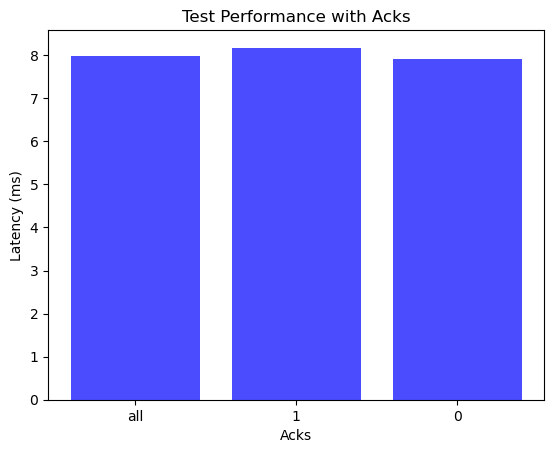

In [8]:
import matplotlib.pyplot as plt

# Data for the histogram
acks = ["all", "1", "0"]
latency = [perf_test_acl_all_latency,perf_test_acl_1_latency,perf_test_acl_0_latency]

# Create the histogram
plt.bar(acks, latency, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Test Performance with Acks")
plt.xlabel("Acks")
plt.ylabel("Latency (ms)")

# Show the plot
plt.show()


In [14]:
perf_test_acl_all_throughput = json_perf_results_ack_all_lat['throughput_records_per_sec']
perf_test_acl_1_throughput = json_perf_results_ack_1_lat['throughput_records_per_sec']
perf_test_acl_0_throughput = json_perf_results_ack_0_lat['throughput_records_per_sec']


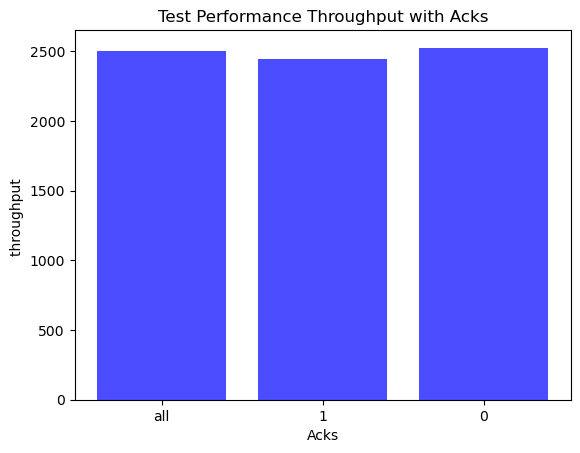

In [16]:
# Data for the histogram
acks = ["all", "1", "0"]
latency = [perf_test_acl_all_throughput,perf_test_acl_1_throughput,perf_test_acl_0_throughput]

# Create the histogram
plt.bar(acks, latency, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Test Performance Throughput with Acks")
plt.xlabel("Acks")
plt.ylabel("throughput ")

# Show the plot
plt.show()

In [13]:
create_topic(bootstrap_servers,"test_leonardo_domain_5",5,1)
create_topic(bootstrap_servers,"test_leonardo_domain_10",10,1)
create_topic(bootstrap_servers,"test_leonardo_domain_20",20,1)
create_topic(bootstrap_servers,"test_leonardo_domain_30",30,1)
create_topic(bootstrap_servers,"test_leonardo_domain_40",40,1)
create_topic(bootstrap_servers,"test_leonardo_domain_50",50,1)
create_topic(bootstrap_servers,"test_leonardo_domain_60",60,1)
#produce_tuning_acks(bootstrap_servers,"performance_test",20000,1024,"all")

Topic 'test_leonardo_domain_15' created successfully!
An error occurred: [Error 37] InvalidPartitionsError: Request 'CreateTopicsRequest_v3(create_topic_requests=[(topic='test_leonardo_domain_25', num_partitions=25, replication_factor=1, replica_assignment=[], configs=[])], timeout=30000, validate_only=False)' failed with response 'CreateTopicsResponse_v3(throttle_time_ms=0, topic_errors=[(topic='test_leonardo_domain_25', error_code=37, error_message='Can not increase partition count due to memory limit')])'.
An error occurred: [Error 37] InvalidPartitionsError: Request 'CreateTopicsRequest_v3(create_topic_requests=[(topic='test_leonardo_domain_35', num_partitions=35, replication_factor=1, replica_assignment=[], configs=[])], timeout=30000, validate_only=False)' failed with response 'CreateTopicsResponse_v3(throttle_time_ms=0, topic_errors=[(topic='test_leonardo_domain_35', error_code=37, error_message='Can not increase partition count due to memory limit')])'.
An error occurred: [Erro

In [21]:
partition_troughput=[]
partition_latency=[]
number_partitions = [5,10,15,20,30,40,50,60]
for n in [5,10,15,20,30,40,50,60]:
    produced_dict = produce_tuning_acks(bootstrap_servers,"test_leonardo_domain_{}".format(n),10000,1024,"all")
    print("test_leonardo_domain_{}".format(n))
    partition_troughput.append(produced_dict['throughput_records_per_sec'])
    partition_latency.append(produced_dict['elapsed_time_sec'])
    
print(partition_troughput)
print(partition_latency)

-----------------RESULTS-----------------
The results are returned
test_leonardo_domain_5
-----------------RESULTS-----------------
The results are returned
test_leonardo_domain_10
-----------------RESULTS-----------------
The results are returned
test_leonardo_domain_15
-----------------RESULTS-----------------
The results are returned
test_leonardo_domain_20
-----------------RESULTS-----------------
The results are returned
test_leonardo_domain_30
-----------------RESULTS-----------------
The results are returned
test_leonardo_domain_40
-----------------RESULTS-----------------
The results are returned
test_leonardo_domain_50
-----------------RESULTS-----------------
The results are returned
test_leonardo_domain_60
[1382.433796388721, 1350.8933737330897, 1246.404403238883, 1203.9594247431496, 1198.6042102536617, 1213.524780526775, 1122.4103709623885, 1164.1176447404875]
[7.233619451522827, 7.402508735656738, 8.023078203201294, 8.305927753448486, 8.343037605285645, 8.240458011627197, 

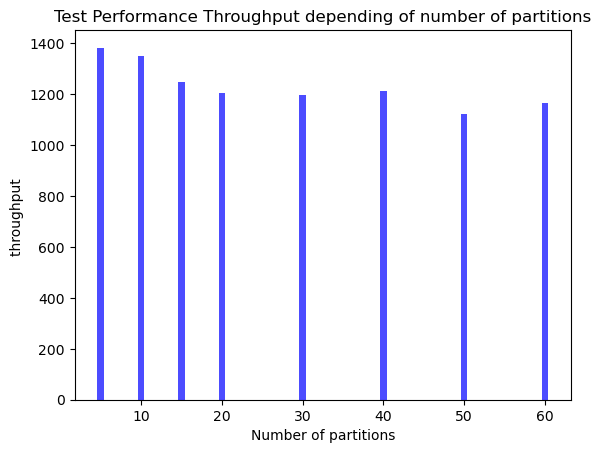

In [24]:
# Create the histogram
number_partitions = [5,10,15,20,30,40,50,60]
plt.bar(number_partitions, partition_troughput, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Test Performance Throughput depending of number of partitions")
plt.xlabel("Number of partitions")
plt.ylabel("throughput ")

# Show the plot
plt.show()

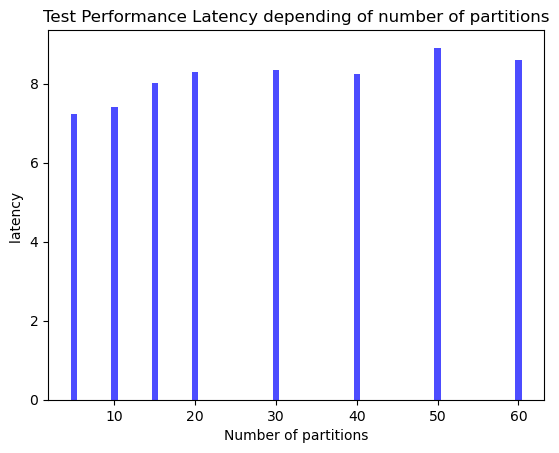

In [25]:
# Create the histogram
plt.bar(number_partitions, partition_latency, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Test Performance Latency depending of number of partitions")
plt.xlabel("Number of partitions")
plt.ylabel("latency ")

# Show the plot
plt.show()

In [32]:
#son_test = produce_tuning_acks(bootstrap_servers,"test_leonardo_domain",20000,1024,"all","gzip")
#son_test
compression_latency=[]
compression_throughtput=[]
compression_types = [None,"gzip","snappy","lz4","zstd"]
for ctype in compression_types:
    compression_test_json = produce_tuning_acks(bootstrap_servers,"test_leonardo_domain",20000,1024,"all",ctype)
    compression_latency.append(compression_test_json['elapsed_time_sec'])
    compression_throughtput.append(compression_test_json['throughput_records_per_sec'])
print(compression_latency)
print(compression_throughtput)
                                                         

-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
[12.129553318023682, 1.4960920810699463, 8.19894528388977, 7.410383224487305, 4.15859580039978]
[1648.8653354020362, 13368.161126617812, 2439.3381474685893, 2698.91575025578, 4809.315682490068]


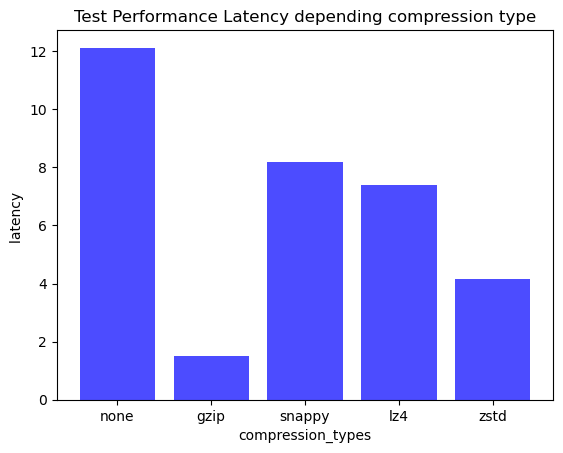

In [35]:
# Create the histogram
compression_types_graph = ["none","gzip","snappy","lz4","zstd"]
plt.bar(compression_types_graph, compression_latency, color='blue', alpha=0.7)
# Add titles and labels
plt.title("Test Performance Latency depending compression type")
plt.xlabel("compression_types")
plt.ylabel("latency ")

# Show the plot
plt.show()

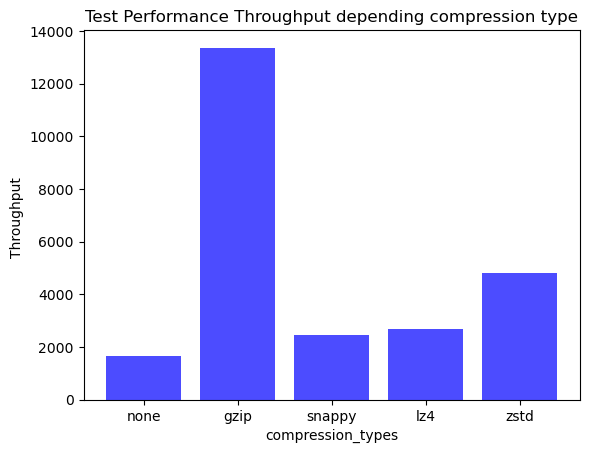

In [36]:
plt.bar(compression_types_graph, compression_throughtput, color='blue', alpha=0.7)
# Add titles and labels
plt.title("Test Performance Throughput depending compression type")
plt.xlabel("compression_types")
plt.ylabel("Throughput ")

# Show the plot
plt.show()

In [45]:
#----------------BATCH.SIZE=16384, LINGER.MS=0(DEFAULT)----------------"
#"test_leonardo_domain_{}".format(n),10000,1024,"all"
import numpy as np
batch_size_list = np.arange(1000,21000,1000).tolist()
batch_latency = []
batch_thrughput = []
for batch in batch_size_list:
    batch_json = produce_tuning_acks(bootstrap_servers,"test_leonardo_domain",10000,1024,"all",None,batch,0)
    batch_latency.append(batch_json['elapsed_time_sec'])
    batch_thrughput.append(batch_json['throughput_records_per_sec'])
print(batch_latency)
print(batch_thrughput)
#jtest = produce_tuning_acks(bootstrap_servers,"test_leonardo_domain",10000,1024,"all",None,batch_size,0)

-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are retu

[8.324469566345215, 7.6103737354278564, 7.589075326919556, 6.81794548034668, 7.330042362213135, 6.645433187484741, 7.531964540481567, 6.302893877029419, 5.87071681022644, 5.970952033996582, 7.251752853393555, 6.359933853149414, 5.836002349853516, 5.870241165161133, 5.44101357460022, 5.839968204498291, 6.8010783195495605, 6.071925640106201, 7.315888166427612, 5.956361293792725]
[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]


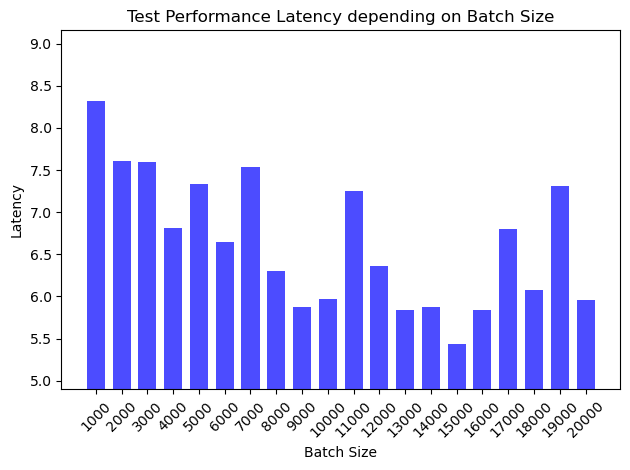

In [52]:
print(batch_latency)
print(batch_size_list)
# Create bar chart
plt.bar(batch_size_list, batch_latency, width=700, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Test Performance Latency depending on Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Latency")

# Set dynamic Y-axis limit
plt.ylim(min(batch_latency) * 0.9, max(batch_latency) * 1.1)

# Adjust the X-axis ticks
plt.xticks(batch_size_list, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

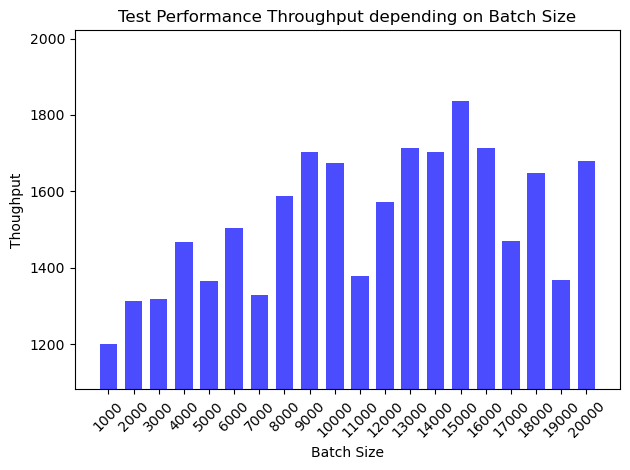

In [53]:
plt.bar(batch_size_list, batch_thrughput, width=700, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Test Performance Throughput depending on Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Thoughput")

# Set dynamic Y-axis limit
plt.ylim(min(batch_thrughput) * 0.9, max(batch_thrughput) * 1.1)

# Adjust the X-axis ticks
plt.xticks(batch_size_list, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
linger_size_list = np.arange(10,100,10).tolist()
linger_latency = []
linger_throughput = []
for linger in linger_size_list:
    linger_json = produce_tuning_acks(bootstrap_servers,"test_leonardo_domain",10000,1024,"all",None,16384,linger)
    linger_latency.append(linger_json['elapsed_time_sec'])
    linger_throughput.append(linger_json['throughput_records_per_sec'])
print(linger_latency)
print(linger_throughput)


-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
-----------------RESULTS-----------------
The results are returned
[4.06904411315918, 3.959681272506714, 3.905003309249878, 3.988074541091919, 3.923004627227783, 3.9191410541534424, 3.877068042755127, 3.9808082580566406, 4.036772727966309]
[2457.579648168539, 2525.4557909579944, 2560.8172920910856, 2507.4756996046617, 2549.0665829437385, 2551.5795073010095, 2579.268635402588, 2512.05266663153, 2477.2264068078744]


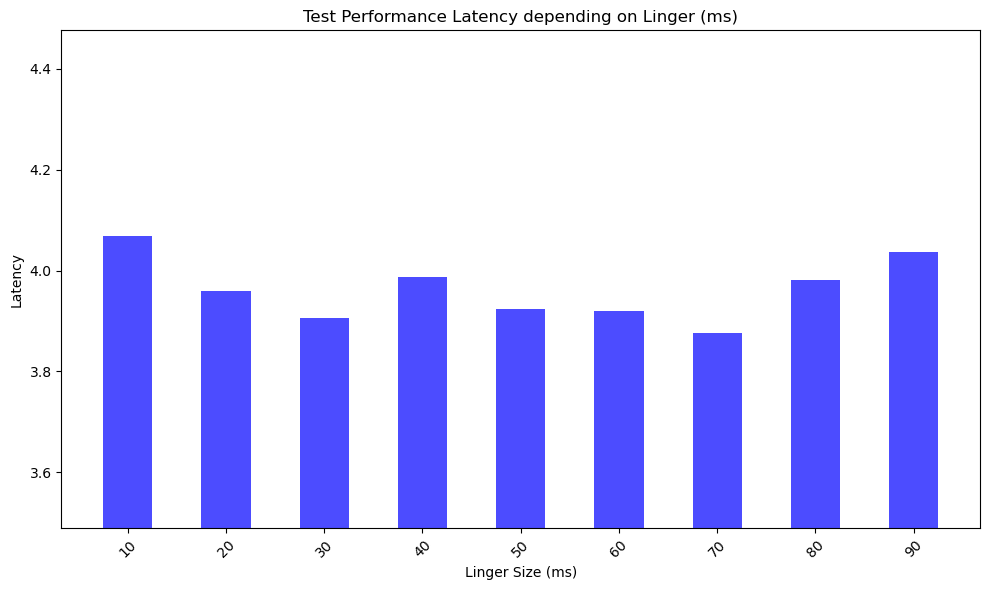

In [55]:
# Create bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.bar(linger_size_list, linger_latency, width=5, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Test Performance Latency depending on Linger (ms)")
plt.xlabel("Linger Size (ms)")
plt.ylabel("Latency")

# Set dynamic Y-axis limit
plt.ylim(min(linger_latency) * 0.9, max(linger_latency) * 1.1)

# Adjust X-axis ticks
plt.xticks(linger_size_list, rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

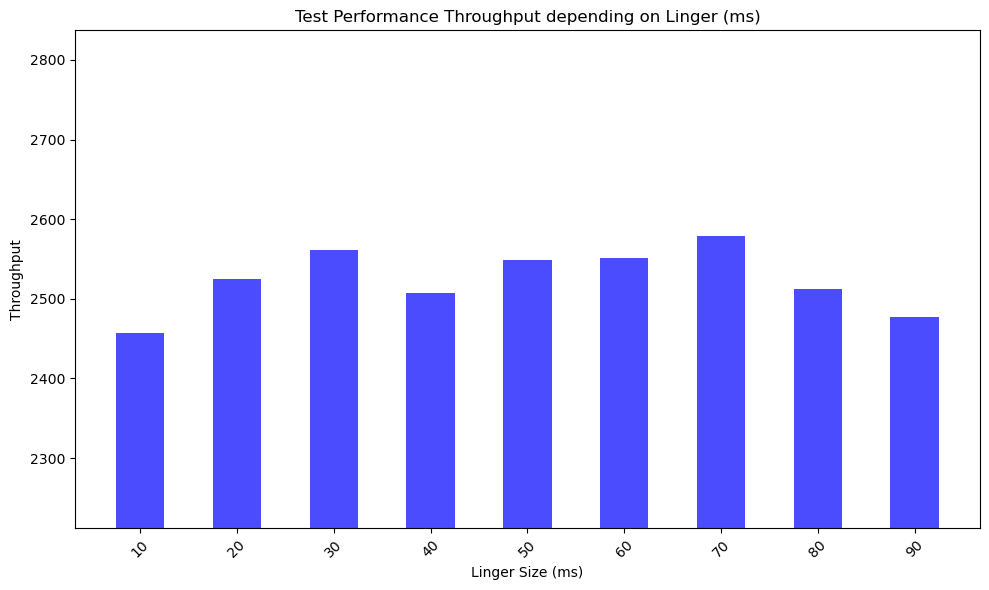

In [56]:
# Create bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.bar(linger_size_list, linger_throughput, width=5, color='blue', alpha=0.7)

# Add titles and labels
plt.title("Test Performance Throughput depending on Linger (ms)")
plt.xlabel("Linger Size (ms)")
plt.ylabel("Throughput")

# Set dynamic Y-axis limit
plt.ylim(min(linger_throughput) * 0.9, max(linger_throughput) * 1.1)

# Adjust X-axis ticks
plt.xticks(linger_size_list, rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()